In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"yoake0","key":"2d02122c01898bfbdc33ca49bd68f377"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d mkubina/train-csv

Dataset URL: https://www.kaggle.com/datasets/mkubina/train-csv
License(s): unknown
 75% 20.0M/26.7M [00:00<00:00, 90.0MB/s]
100% 26.7M/26.7M [00:00<00:00, 111MB/s] 


In [5]:
import zipfile

with zipfile.ZipFile('/content/train-csv.zip', 'r') as zip_ref:
    zip_ref.extractall('comments.csv')

In [6]:
import pandas as pd

df = pd.read_csv('/content/comments.csv/train.csv')
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [7]:
df.isnull().sum()

,0
id,0
comment_text,0
toxic,0
severe_toxic,0
obscene,0
threat,0
insult,0
identity_hate,0


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=5000)  # Limit to top 5000 features
X = vectorizer.fit_transform(df['comment_text'])

In [10]:
from sklearn.model_selection import train_test_split

y = df['toxic']  # You can choose other labels like 'severe_toxic', 'obscene', etc.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98     28859
           1       0.91      0.62      0.73      3056

    accuracy                           0.96     31915
   macro avg       0.93      0.81      0.86     31915
weighted avg       0.96      0.96      0.95     31915



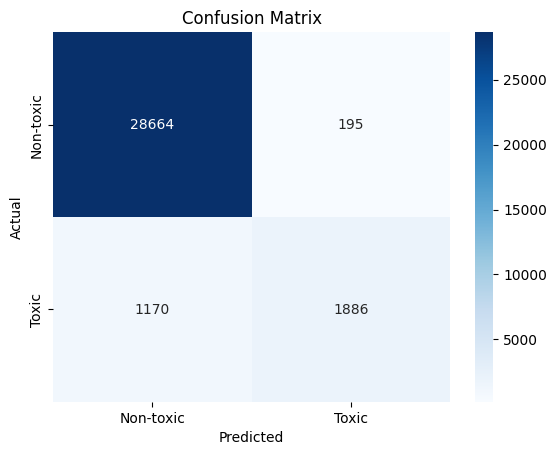

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-toxic', 'Toxic'], yticklabels=['Non-toxic', 'Toxic'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [20]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", scores)

Cross-validation scores: [0.95697948 0.95773015 0.9571348  0.95776148 0.95816883]


In [21]:
import joblib

joblib.dump(model, 'toxic_comment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

In [ ]:
def classify_comment(comment):
    comment_vectorized = vectorizer.transform([comment])
    prediction = model.predict(comment_vectorized)

    return "Inappropriate" if prediction[0] == 1 else "Appropriate"

while True:
    user_comment = input("Enter a comment (or type 'exit' to quit): ")
    if user_comment.lower() == 'exit':
        break
    result = classify_comment(user_comment)
    print(f"The comment is classified as: {result}")

Enter a comment (or type 'exit' to quit): you mf you wrenched me
The comment is classified as: Inappropriate
Enter a comment (or type 'exit' to quit): u piss me off
The comment is classified as: Inappropriate
Enter a comment (or type 'exit' to quit): i hate you
The comment is classified as: Inappropriate
Enter a comment (or type 'exit' to quit): i fucking love you
The comment is classified as: Inappropriate
Enter a comment (or type 'exit' to quit): yess holly shit
The comment is classified as: Inappropriate
